# Data exploration 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine

from config import usr, pwd, url, port, db

%matplotlib inline

In [2]:
engine = create_engine(f"postgresql+psycopg2://{usr}:{pwd}@{url}:{port}/{db}")

In [3]:
query = f'''
SELECT
    *
FROM
    {db};
'''

In [4]:
df = pd.read_sql_query(query, con=engine)

In [5]:
def find_na_columns(df, display_fractions=False):
    na_fractions = (df.isnull().sum()/df.isnull().count())*100
    if display_fractions:
        print(na_fractions)
    return na_fractions[na_fractions != 0]

In [6]:
def apply_interpolation(df):
    df_interpolated = df.copy()
    year_list = np.unique(df['YEAR'])
    
    for year in year_list:
        na_fractions_year = find_na_columns(df_interpolated.loc[df_interpolated['YEAR'] == year, :])
        for column in na_fractions_year.index.tolist():
            if na_fractions_year[column] == 100.0:
                if year == year_list.min():
                    continue
                else:
                    df_interpolated.loc[df_interpolated['YEAR'] == year, 
                                column] = df_interpolated.loc[df_interpolated['YEAR'] == year-1, 
                                                              column].interpolate()
            else:
                df_interpolated.loc[df_interpolated['YEAR'] == year,
                                    column] = df_interpolated.loc[df_interpolated['YEAR'] == year,
                                                                  column].interpolate()
    return df_interpolated

In [7]:
df_clean = apply_interpolation(df)

In [8]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1492.0,2.004434e+03,7.393983e+00,1992.000000,1.998000e+03,2.004000e+03,2.011000e+03,2.017000e+03
ENROLL,1385.0,8.275492e+05,1.035312e+06,43866.000000,1.498010e+05,5.324330e+05,9.624880e+05,6.307022e+06
TOTAL_REVENUE,1441.0,8.245375e+06,1.133687e+07,465650.000000,1.684706e+06,4.330089e+06,9.670620e+06,8.921726e+07
FEDERAL_REVENUE,1441.0,6.923030e+05,1.099649e+06,31020.000000,1.402420e+05,3.507970e+05,7.730140e+05,9.990221e+06
STATE_REVENUE,1441.0,3.833809e+06,5.342626e+06,0.000000,8.809160e+05,2.259753e+06,4.517924e+06,5.090457e+07
LOCAL_REVENUE,1441.0,3.719263e+06,5.287804e+06,22093.000000,6.229910e+05,1.660527e+06,4.108728e+06,3.610526e+07
TOTAL_EXPENDITURE,1441.0,8.336934e+06,1.155975e+07,481665.000000,1.675477e+06,4.363308e+06,9.779642e+06,8.532013e+07
INSTRUCTION_EXPENDITURE,1441.0,4.315352e+06,6.070526e+06,265549.000000,8.468720e+05,2.236724e+06,5.148806e+06,4.396452e+07
SUPPORT_SERVICES_EXPENDITURE,1441.0,2.431959e+06,3.241094e+06,139963.000000,5.048380e+05,1.257432e+06,2.865861e+06,2.605802e+07
OTHER_EXPENDITURE,1385.0,3.862203e+05,5.176803e+05,11541.000000,6.489600e+04,2.298470e+05,4.793520e+05,3.995951e+06


**Observations:**

* Large range in values for revenue and expenditures.
* A lot of missing score values.
* INSTRUCTION_EXPENDITURE has the largest expenditure among the subgroups of expenditures.
* FEDERAL_REVENUE is smaller than revenue on the state and local level.

In [9]:
df_state = df_clean.loc[df_clean['STATE'] == 'CALIFORNIA', :].copy()
df_state = df_state.set_index('YEAR')

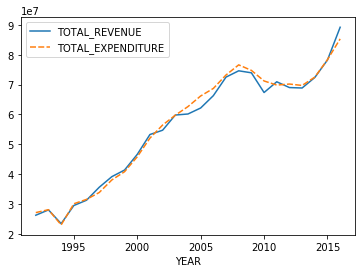

In [10]:
columns_list = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']
sns.lineplot(data=df_state.loc[:, columns_list])
plt.show()

**Observations:**
There is a dip in both revenue and expenditure around 2008. This was the year of the big recession, which could explain this decline.

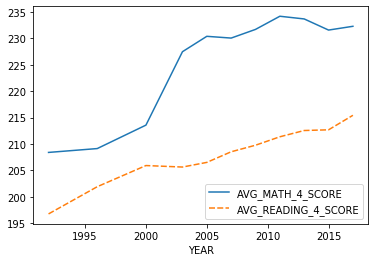

In [11]:
columns_list = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']
sns.lineplot(data=df_state.loc[:, columns_list])
plt.show()

**Observations:**
Fourth grade students are more successful in math than reading in California.

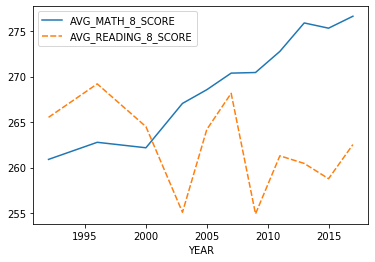

In [12]:
columns_list = ['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
sns.lineplot(data=df_state.loc[:, columns_list])
plt.show()

**Observations:**
After 2000, eighth grade students are better in math than reading.

### Distributions in scores
Consider distributions before correcting for missing values.

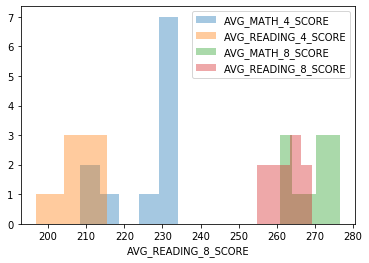

In [13]:
columns_list = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
for column in columns_list:
    sns.distplot(df_state.loc[df_state[column].notnull(), column], bins=5, kde=False, label=column)
plt.legend()
plt.show()

In [14]:
def correct_missing_values(df, columns_list):

    df = df.copy()
    
    for column in columns_list:
        df[f'mean_{column}'] = df[column].fillna(df[column].mean())

    for column in columns_list:
        df[f'median_{column}'] = df[column].fillna(df[column].median())

    for column in columns_list:
        df[f'interpolated_{column}'] = df[column].interpolate()
        
    return df

In [15]:
columns_list = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']
df_corrected = correct_missing_values(df_state, columns_list)

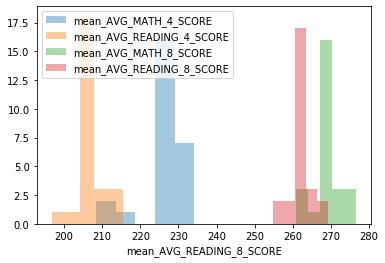

In [16]:
columns_list = ['mean_AVG_MATH_4_SCORE', 'mean_AVG_READING_4_SCORE', 
                'mean_AVG_MATH_8_SCORE', 'mean_AVG_READING_8_SCORE']
for column in columns_list:
    sns.distplot(df_corrected.loc[df_corrected[column].notnull(), column], bins=5, kde=False, label=column)
plt.legend()
plt.show()

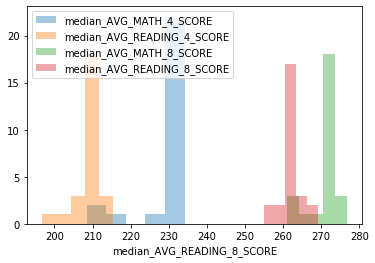

In [17]:
columns_list = ['median_AVG_MATH_4_SCORE', 'median_AVG_READING_4_SCORE', 
                'median_AVG_MATH_8_SCORE', 'median_AVG_READING_8_SCORE']
for column in columns_list:
    sns.distplot(df_corrected.loc[df_corrected[column].notnull(), column], bins=5, kde=False, label=column)
plt.legend()
plt.show()

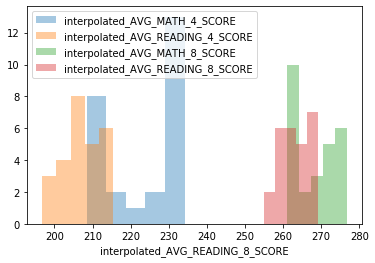

In [18]:
columns_list = ['interpolated_AVG_MATH_4_SCORE', 'interpolated_AVG_READING_4_SCORE', 
                'interpolated_AVG_MATH_8_SCORE', 'interpolated_AVG_READING_8_SCORE']
for column in columns_list:
    sns.distplot(df_corrected.loc[df_corrected[column].notnull(), column], bins=5, kde=False, label=column)
plt.legend()
plt.show()

**Observations:** After correcting for the missing values, the mean and median methods show spikes where the missing values have been replaced. Interpolattion does a better job of keeping the distributions more uniform.